In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({
    'study_time': np.random.uniform(low=1,high=30,size=100),
    'score': np.random.uniform(low=30,high=100,size=100),
})

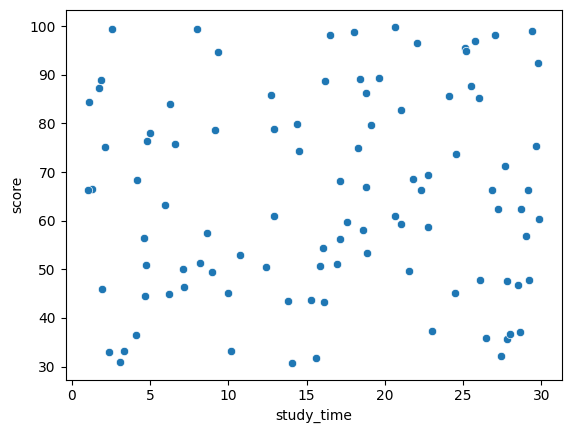

In [3]:
sns.scatterplot(data=df,x='study_time',y='score')
plt.show()

In [4]:
def mean_square_error(m, b, dataframe):
    total_error = 0
    len_dataframe = len(dataframe)
    for i in range(len_dataframe):
        x = dataframe.iloc[i].study_time
        y = dataframe.iloc[i].score
        # The real value minus prediction value squared
        total_error += (y - (m * x + b)) ** 2
    return total_error / len_dataframe

def derivative_mean_square_error(x,y,m,b,n):
    m_parcial_derivative = (2 * (y - (m * x + b)) * (-x)) / n
    b_parcial_derivative = (-2 * (y - (m * x + b))) / n
    return m_parcial_derivative, b_parcial_derivative
    

def gradient_descent(m_now, b_now, dataframe,learning_rate):
    m_gradient = 0
    b_gradient = 0
    len_dataframe = len(dataframe)
    for i in range(len_dataframe):
        x = dataframe.iloc[i].study_time
        y = dataframe.iloc[i].score
        m_derivative, b_derivative = derivative_mean_square_error(x,y,m_now,b_now,len_dataframe)
        m_gradient += m_derivative
        b_gradient += b_derivative
    m = m_now - learning_rate * m_gradient
    b = b_now - learning_rate * b_gradient
    return m,b
    

Epoch: 0
Epoch: 100
Epoch: 200
2.686817334310027 8.270333087770023


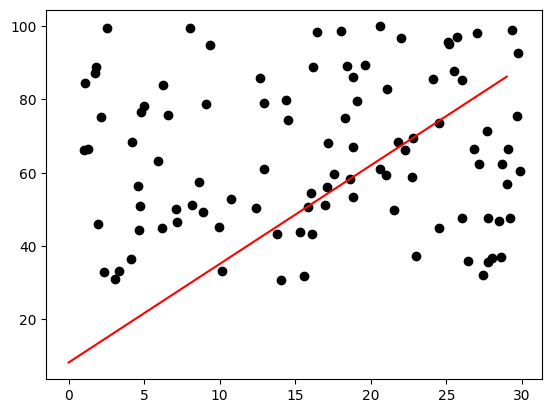

In [6]:
epochs = 300
learning_rate = 0.001 
m = 0
b = 0
for i in range(epochs):
    if i % 100 == 0:
        print(f'Epoch: {i}')
    m,b = gradient_descent(m,b,df,learning_rate)
print(m,b)
plt.scatter(df.study_time,df.score,color='black')
range_study = range(int(df.study_time.min()) - 1,int(df.study_time.max()) + 1)
plt.plot(list(range_study), [m * x + b for x in range_study],color='red')
plt.show()